In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size':20})
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
str_files = ''
#Carrega os dados do arquivo .csv
df = pd.read_csv(str_files + "cetesb_concatenado06semoutliers.csv",encoding='utf-8',sep=',')
trainingd = df

In [7]:
def seleciona_colunas(trainingd):
    fdbo     = trainingd.iloc[:,2:3].values
    #ffosforo = trainingd.iloc[:,2:3].values
    fph      = trainingd.iloc[:,0:1].values
    fsolido  = trainingd.iloc[:,5:6].values
    
    #frame_completo = pd.DataFrame(list(zip(fdbo, ffosforo,fsolido,fph)),columns =['dbo', 'fosforo','solido','ph']) 
    frame_completo = pd.DataFrame(list(zip(fdbo,fsolido,fph)),columns =['dbo','solido','ph']) 
    
    return frame_completo

def pegar_dados_coluna_predita_train_test(trainingd,percent,index_coluna):
    data = trainingd.iloc[:,:].values
    train = trainingd.iloc[0:int(len(data)*percent),:].values  
    train_previsao = trainingd.iloc[0:int(len(data)*percent),index_coluna:index_coluna+1].values
    test = trainingd.iloc[len(train):,index_coluna:index_coluna+1].values
    
    print('Nº observações:', len(data))
    print('treino:',len(train))
    print('teste:',len(test))
    
    return train,train_previsao, test

#Normalização dos dados: Normaliza os dados dentro um intervalo (0 a 1).
def normalizacao(train,test):
    sc = MinMaxScaler()
    testd = test
    train = sc.fit_transform(train)
    test = sc.fit_transform(test)    
    return train,test,testd

#Prepara o conjunto de dados em X e y, considerando a janela de visualização (lags).
#cy = coluna que será predita
def prepara_dados(dados,lags,cy):
    X = []
    y = []
    for i in range(lags, len(dados)):
        X.append(dados[i-lags:i,:])
        y.append(dados[i, cy])
       
    return np.array(X), np.array(y)

#Calcula o MAPE
#Define função para calcular o MAPE
#def mape(y_pred,y_true):
 #   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mape(y_pred,y_true):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    '''  
    mape_sum = 0
    for real,prediction in zip(y_true,y_pred):
        mape_sum += (abs((real - prediction))/real)
        
        print(real)
        mape = mape_sum/len(real)
    '''
    return mape

def rmse(y_pred,y_true):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

def r2(y_pred,y_true):
    rscore = r2_score(y_true,y_pred)
    return rscore

def rquadrado(y_pred,y_true):
    #Soma Total dos Quadrados (STQ): mostra a variação de y em torno da própria média. 
    #É o somatório das diferenças entre o valor alvo real e sua média elevado ao quadrado.
    y_traco = np.mean(y_true)
    
    print('media y_true:', y_traco)
        
    stq = 0
    
    for s in y_true:
        a = s - y_traco
        st = a * a
        stq = stq + st
    
    print('Soma Total dos Quadrados (STQ):', stq[0])
    
    #Soma dos Quadrados dos Resíduos (SQU): variação de Y que não é explicada pelo modelo elaborado. 
    #É o somatório das diferenças entre o valor predito e o valor real elevados ao quadrado.
    squ = 0
    
    y_traco = np.mean(y_pred)
    print('media y_pred:', y_traco)
    
    for n in range(len(y_true)):
        a = y_true[n] - y_pred[n]
        st = a * a
        squ = squ + st
        
    print('Soma dos Quadrados dos Resíduos (SQU):',squ[0])
    print('\n')
    print('Fórmula do R²')
    print('\n')
    print('sqr = stq - squ')
    sqr = stq[0] - squ[0]
    print('R² = sqr/stq')
    sqr = sqr/stq[0]
    print('\n')
    return sqr

def correlacao_determinacao(dtframe,tipo):
    
    if (tipo == 0): #Treino
        resultado = dtframe.corr().previsao_treino.values[1] ** 2 
    else: #teste
        resultado = dtframe.corr().previsao_teste.values[1] ** 2 
    
    return resultado

def ajusta_array(array):
    lista = []
    
    for i in range(len(array)):
        lista.append(array[i][0])
        
    #print('ajusta array:',lista)
        
    return lista

def ajusta_lista(array):
    lista = []
    
    for i in range(len(array)):
        lista.append(array[i][0])
        
    #print('ajusta array:',lista)
        
    return lista


Nº observações: 503
treino: 352
teste: 151
Teste - Gráficos com lag 1


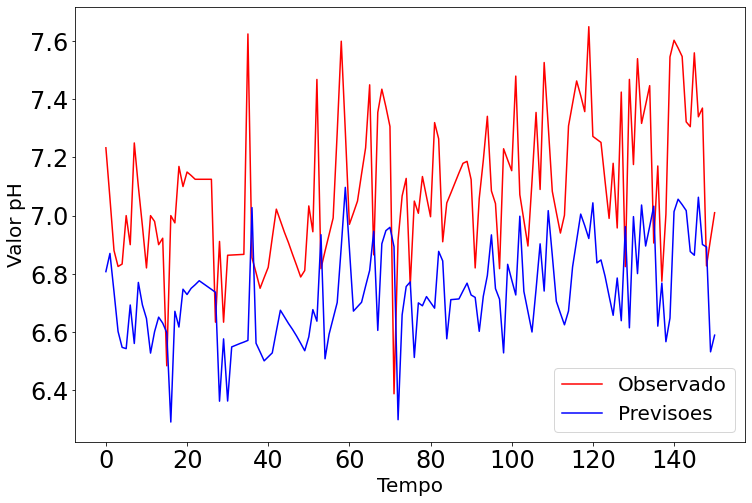

Treinamento - Gráficos com lag 1


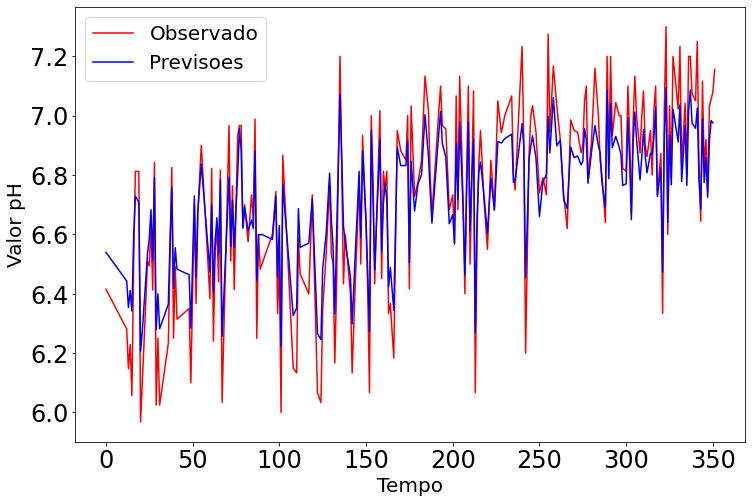

Nº observações: 503
treino: 352
teste: 151
Teste - Gráficos com lag 2


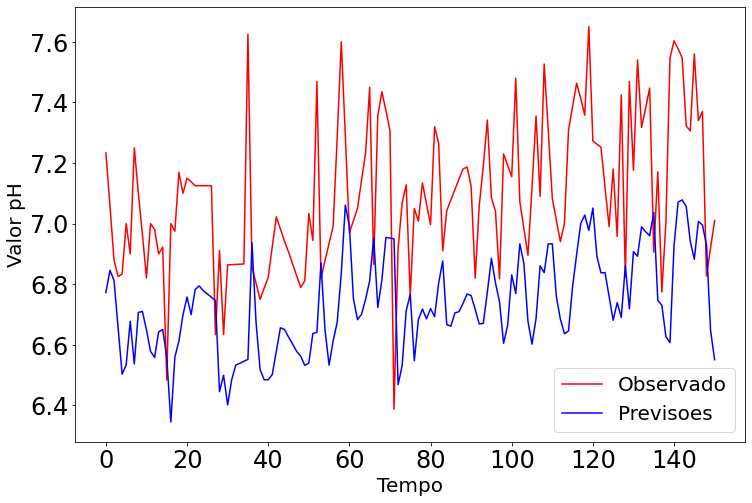

Treinamento - Gráficos com lag 2


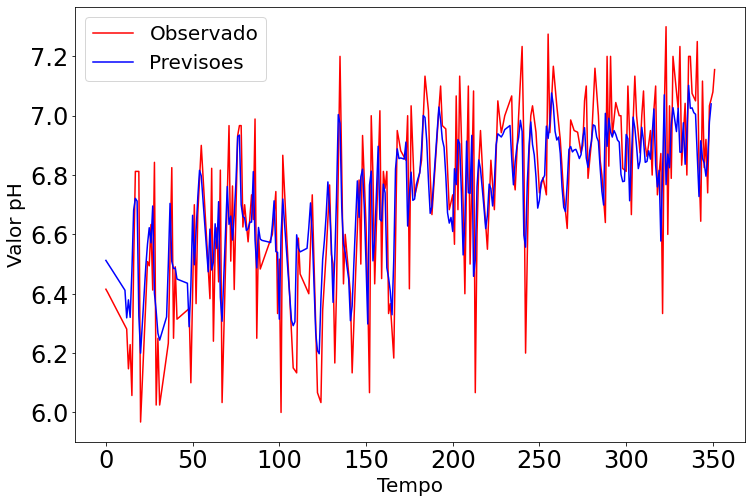

Nº observações: 503
treino: 352
teste: 151
Teste - Gráficos com lag 3


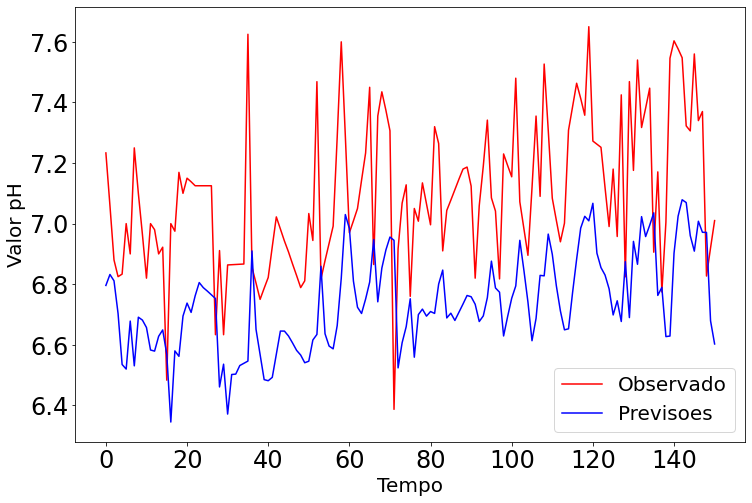

Treinamento - Gráficos com lag 3


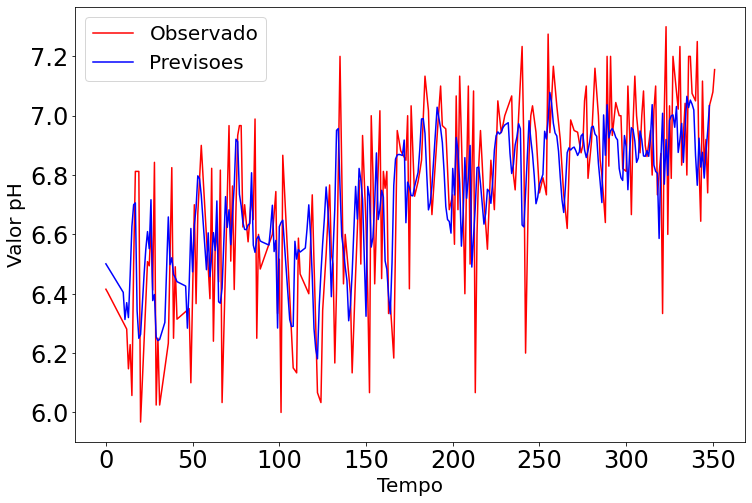

Nº observações: 503
treino: 352
teste: 151
Teste - Gráficos com lag 4


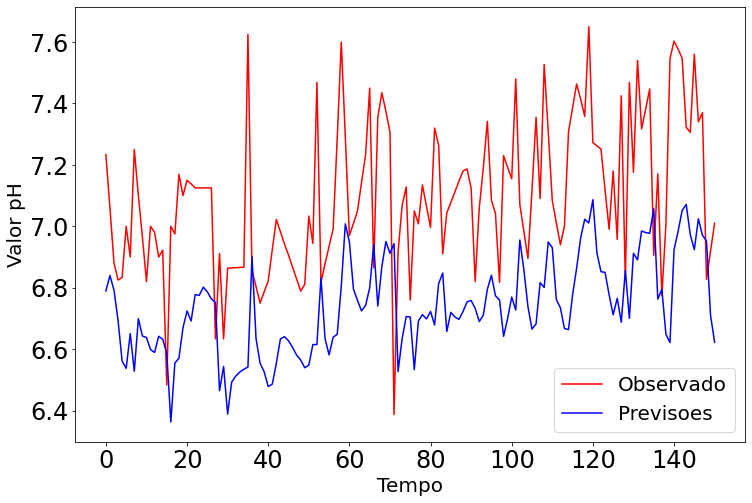

Treinamento - Gráficos com lag 4


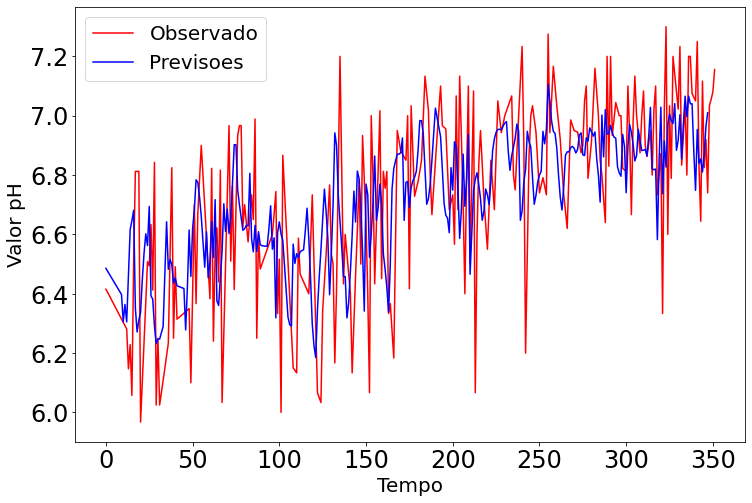

Nº observações: 503
treino: 352
teste: 151
Teste - Gráficos com lag 5


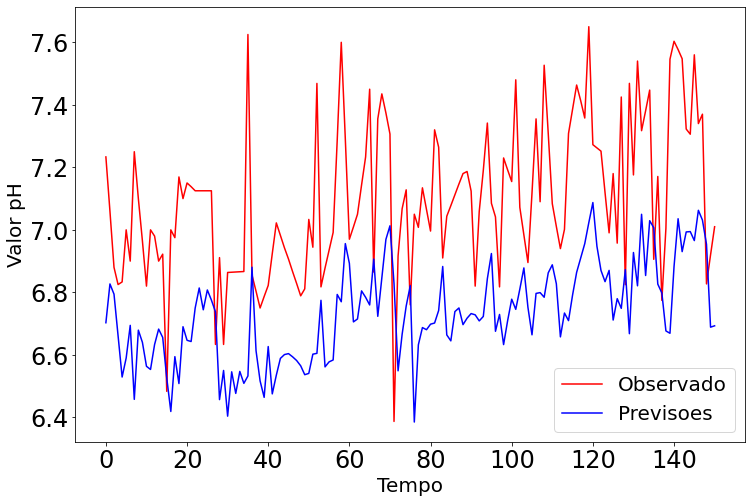

Treinamento - Gráficos com lag 5


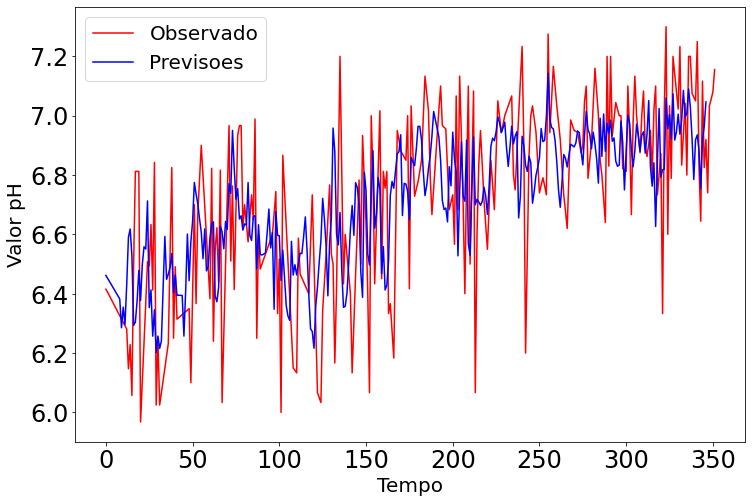

Nº observações: 503
treino: 352
teste: 151
Teste - Gráficos com lag 6


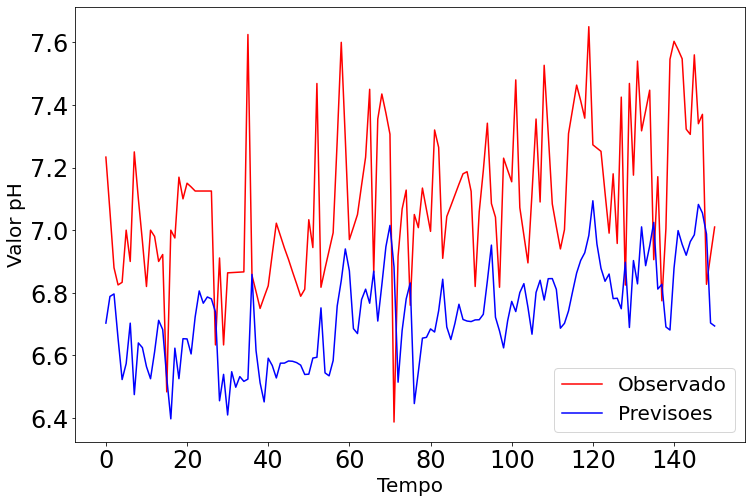

Treinamento - Gráficos com lag 6


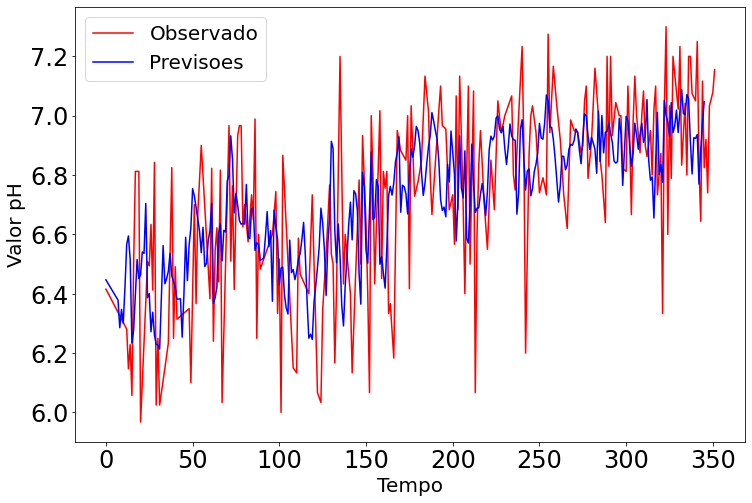

Nº observações: 503
treino: 352
teste: 151
Teste - Gráficos com lag 7


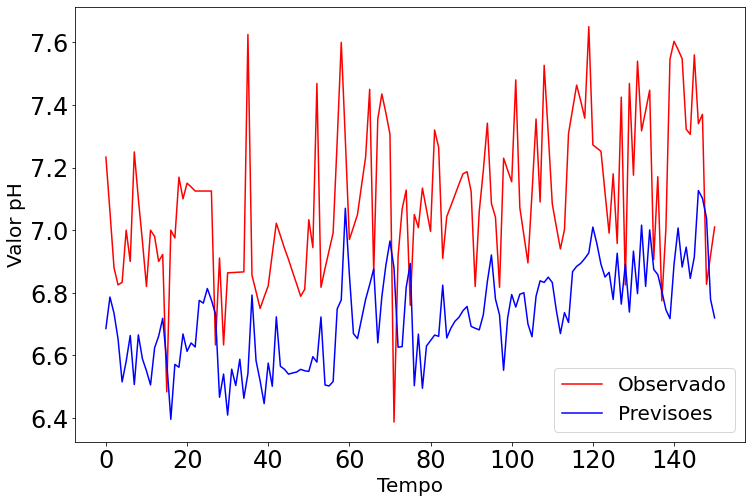

Treinamento - Gráficos com lag 7


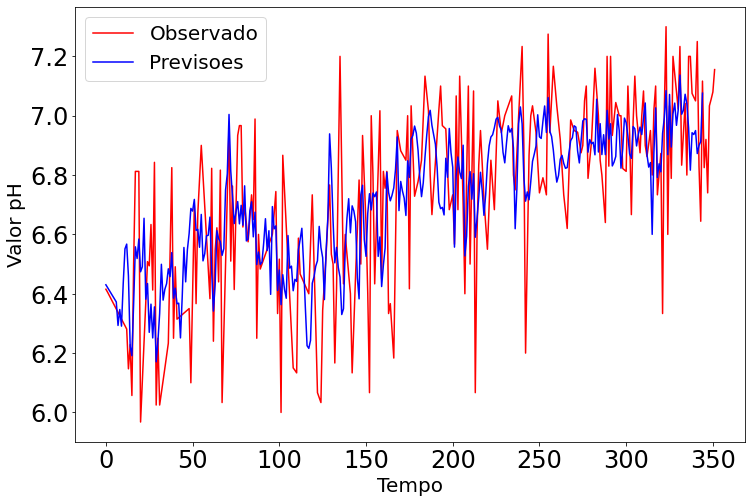

Nº observações: 503
treino: 352
teste: 151
Teste - Gráficos com lag 8


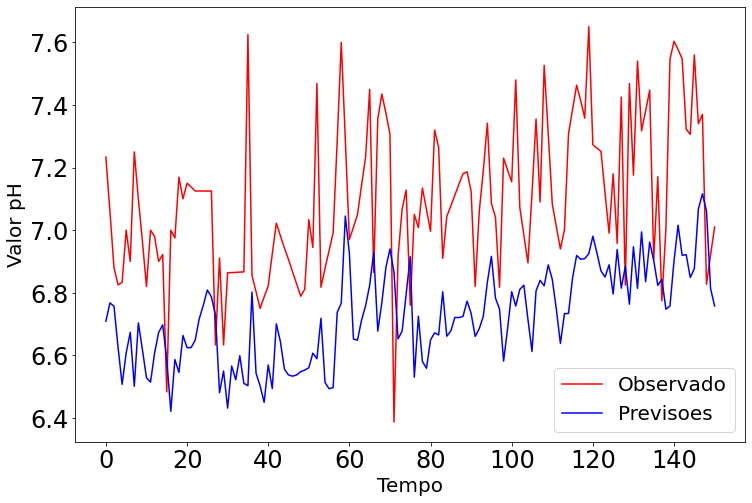

Treinamento - Gráficos com lag 8


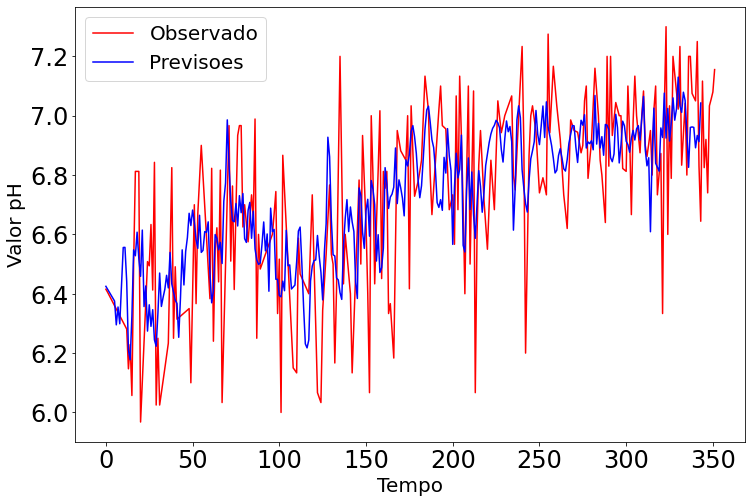

Nº observações: 503
treino: 352
teste: 151
Teste - Gráficos com lag 9


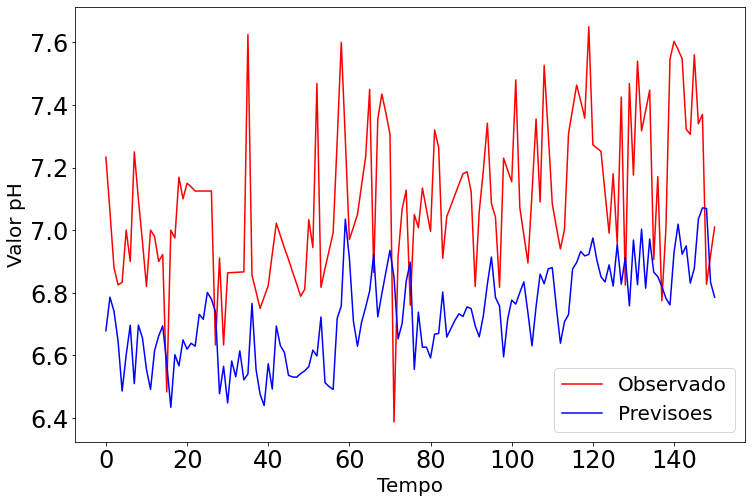

Treinamento - Gráficos com lag 9


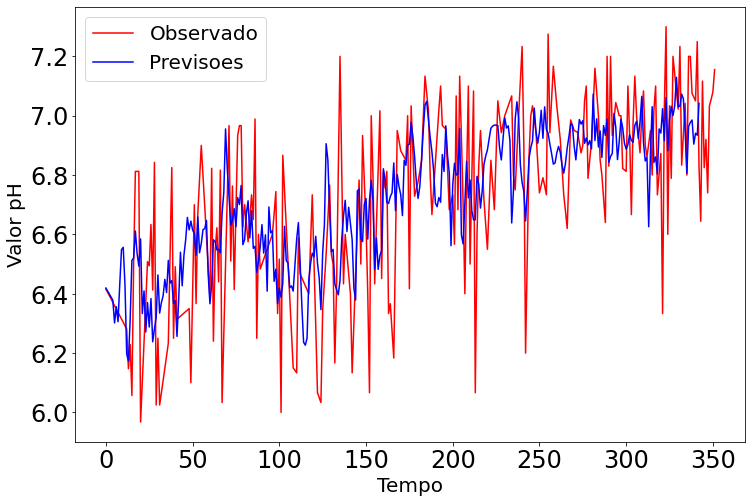

In [8]:
trainingd = seleciona_colunas(df)

df_resultados_treino = pd.DataFrame()
df_resultados_teste = pd.DataFrame()
df_resultados = pd.DataFrame()

#lags = (3,5,7) 
for l in range(1, 10):
    
    lags = l
    
    #seleciona os dados
    
    train,train_previsao, test = pegar_dados_coluna_predita_train_test(trainingd,0.70,2) 
    
    #normalização dos dados
    train,test,testd = normalizacao(train,test)
    normalizador_previsao = MinMaxScaler()
    sc = MinMaxScaler()
    normalizador_previsao.fit_transform(train_previsao)
     
    #Prepara os dados de treinamento
    #Vai predizer o valor da coluna 4 (valor ph)
    train_X, train_y = prepara_dados(train, lags,2)
        
    #Prepara os dados de teste
    entradas = trainingd[len(trainingd) - len(test) - lags:].values
    entradas = sc.fit_transform(entradas)   
    
    test_X = []
    for i in range(lags, lags+len(test)):
        test_X.append(entradas[i-lags:i, 0:3])
    test_X = np.array(test_X)
    
    #Ajusta a dimensão de test_X e train_X
    nsamples, nx, ny = test_X.shape
    test_X = test_X.reshape((nsamples,nx*ny))
    
    nsamples, nx, ny = train_X.shape
    train_X = train_X.reshape((nsamples,nx*ny))
    
    #Cria o modelo
    model = LinearRegression(normalize=True)
    
    #Treina o modelo
    model.fit(train_X,train_y)
    score = model.score(train_X,train_y)
    #print(score)

    #Dados de teste
    previsoes = model.predict(test_X)
    previsoes = previsoes.reshape(-1, 1)
    previsoes = normalizador_previsao.inverse_transform(previsoes)
       
    print('Teste - Gráficos com lag', l)
    #Plotagem do gráfico
    plt.plot(testd,color='red',label = 'Observado')
    plt.plot(previsoes,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    
    
    
    #Dados de treino
    previsoes_treino = model.predict(train_X)
    previsoes_treino = previsoes_treino.reshape(-1, 1)
    previsoes_treino = normalizador_previsao.inverse_transform(previsoes_treino)
   
    
    print('Treinamento - Gráficos com lag', l)
    #Plotagem do gráfico
    plt.plot(train_previsao,color='red',label = 'Observado')
    plt.plot(previsoes_treino,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
            
    treino = train_previsao[lags: len(previsoes_treino) + lags, :]
    observado_test = testd
           
    observado_treino = train_previsao
        
    treino         = ajusta_array(treino)
    observado_test = ajusta_array(observado_test)
               
    #Calculo do erro da previsão MAPE, RMSE e R²
    
    observado_treino_d = observado_treino
    previsoes_treino_d = previsoes_treino
    previsoes_d        = previsoes
        
    mape_treino_d        = round(mape(previsoes_treino,treino),4)
    rmse_treino_d        = round(rmse(previsoes_treino,treino),4)
    #r_treino_d           = round(r2(previsoes_treino,treino),4)
        
    mape_teste_d        = round(mape(previsoes,observado_test),4)
    rmse_teste_d        = round(rmse(previsoes,observado_test),4)
    #r_teste_d           = round(r2(previsoes,observado_test),4) 
       
    df_corr_determinacao_treino = pd.DataFrame()
    df_corr_determinacao_teste  = pd.DataFrame()
    
    #Calcula o coeficiente de determinação
    dict = {'previsao_treino': ajusta_lista(previsoes_treino), 'treino': ajusta_array(treino)} 
    
    df_treino = pd.DataFrame(dict)
    dframes_treino = [df_corr_determinacao_treino,df_treino]
    df_corr_determinacao_treino = pd.concat(dframes_treino)
    
    dict = {'previsao_teste': ajusta_lista(previsoes), 'teste': ajusta_array(observado_test)} 
    
    df_teste = pd.DataFrame(dict)
    dframes_teste = [df_corr_determinacao_teste,df_teste]
    df_corr_determinacao_teste = pd.concat(dframes_teste)
    
    r_treino_d = []
    r_teste_d  = []
    
    r_treino_d.append(round(correlacao_determinacao(df_corr_determinacao_treino,0),4))
    r_teste_d.append(round(correlacao_determinacao(df_corr_determinacao_teste,1),4))
    
    lag_treino = []
    lag_teste = []
    
    lag_treino.append(lags)
    lag_teste.append(lags)
        
    # dictionary of lists  
    
    dict = {'lags_treino': lag_treino, 'mape_treino': mape_treino_d, 'rmse_treino': rmse_treino_d,'r_quad_treino':r_treino_d,
            'lags_teste': lag_teste, 'mape_teste': mape_teste_d, 'rmse_teste': rmse_teste_d,'r_quad_teste':r_teste_d} 
    
    df_result = pd.DataFrame(dict)
    dframes = [df_resultados,df_result]
    df_resultados = pd.concat(dframes)
    

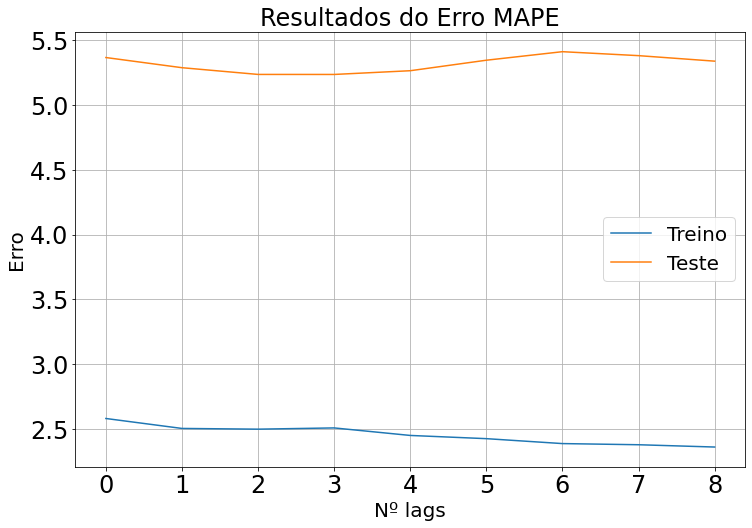

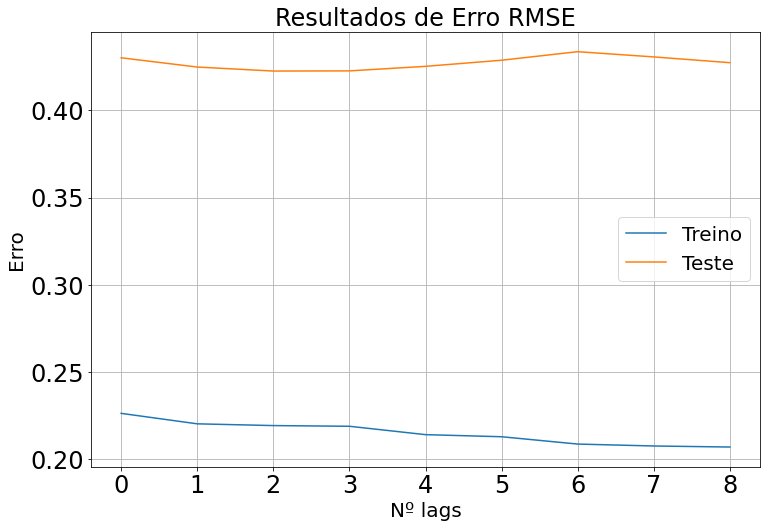

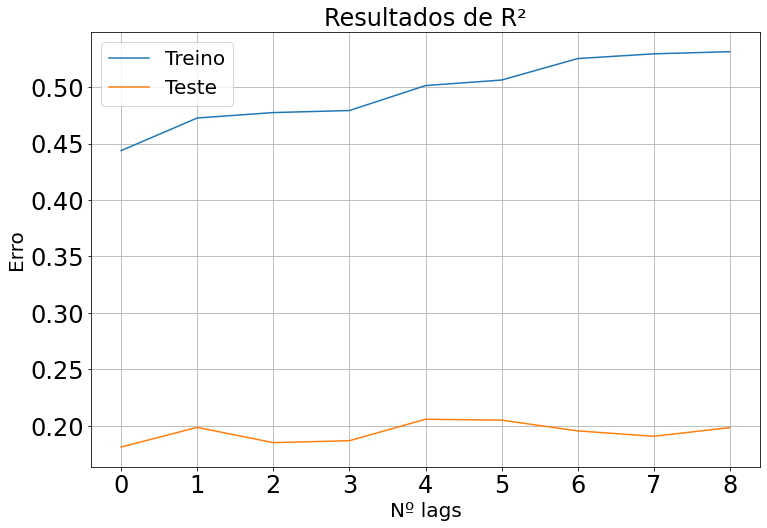

In [9]:
plt.plot(df_resultados.mape_treino.values,label = 'Treino')
plt.plot(df_resultados.mape_teste.values,label  = 'Teste')
plt.xlabel('Nº lags')
plt.ylabel('Erro')
plt.title('Resultados do Erro MAPE')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_resultados.rmse_treino.values,label = 'Treino')
plt.plot(df_resultados.rmse_teste.values,label  = 'Teste')
plt.xlabel('Nº lags')
plt.ylabel('Erro')
plt.title('Resultados de Erro RMSE')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_resultados.r_quad_treino.values,label = 'Treino')
plt.plot(df_resultados.r_quad_teste.values,label  = 'Teste')
plt.xlabel('Nº lags')
plt.ylabel('Erro')
plt.title('Resultados de R²')
plt.legend()
plt.grid()
plt.show()

In [10]:
df_resultados

,lags_treino,mape_treino,rmse_treino,r_quad_treino,lags_teste,mape_teste,rmse_teste,r_quad_teste
0,1,2.5820,0.2264,0.4437,1,5.3663,0.4302,0.1813
0,2,2.5053,0.2204,0.4726,2,5.2879,0.4249,0.1987
0,3,2.4997,0.2194,0.4774,3,5.2360,0.4226,0.1852
0,4,2.5093,0.2190,0.4792,4,5.2358,0.4227,0.1869
0,5,2.4513,0.2142,0.5013,5,5.2646,0.4253,0.2059
0,6,2.4265,0.2130,0.5062,6,5.3456,0.4288,0.2051
0,7,2.3885,0.2088,0.5252,7,5.4114,0.4337,0.1956
0,8,2.3796,0.2077,0.5294,8,5.3809,0.4307,0.1908
0,9,2.3619,0.2071,0.5313,9,5.3384,0.4274,0.1985
